In [13]:
data = open('2005_2013.txt').readlines()

In [14]:
from datetime import datetime
x, y = [], []
for one_data in data:
    current_data = one_data.strip().split(' ')
    date = current_data[0].split('.')
    date = [int(item) for item in date]
    assert(len(date)==3)
    time = current_data[1].split(':')
    time = [int(item) for item in time]
    assert(len(time)==2)
    value = float(current_data[2])
    x.append(float(datetime(date[0], date[1], date[2], time[0], time[1]).strftime("%s")))
    y.append(value)
print x[0], x[1], y[0],y[1]

1104718500.0 1104719400.0 1.356 1.356


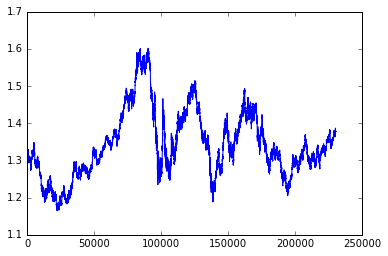

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(y)

In [16]:
from numpy import newaxis
import numpy as np
def train_test_split(data, n_prev):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data[i:i+n_prev])
        docY.append(data[i+n_prev])
    alsX = np.array(docX)[..., newaxis]
    alsY = np.array(docY)[..., newaxis]

    test_size = 0.1
    ntrn = int(round(len(alsY) * (1 - test_size)))
    X_train = alsX[0:ntrn]
    X_test = alsX[ntrn:]
    y_train = alsY[0:ntrn]
    y_test = alsY[ntrn:]
    
    return (X_train, y_train), (X_test, y_test)

In [88]:
n_prev = 5
(X_train, y_train), (X_test, y_test) = train_test_split(y, n_prev)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(207302, 5, 1)
(207302, 1)
(23034, 5, 1)
(23034, 1)


In [89]:
y_test_baseline0 = np.concatenate((y_train[-1:], y_test[:-1]))
rmse = np.sqrt(((y_test_baseline0 - y_test) ** 2).mean(axis=0))
print rmse
print y_test_baseline0.shape

[ 0.0006593]
(23034, 1)


In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM

In [91]:
in_out_neurons = 1
hidden_neurons = 2

model = Sequential()
#model.add(LSTM(in_out_neurons, hidden_neurons, activation='sigmoid', inner_activation='hard_sigmoid'))
#model.add(Dropout(0.5))
model.add(LSTM(input_dim=in_out_neurons, output_dim=hidden_neurons))
model.add(Dense(input_dim=hidden_neurons, output_dim=in_out_neurons))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [109]:
model.fit(X_train, y_train, batch_size=1000, nb_epoch=5, validation_data=(X_test, y_test), shuffle=True)

Train on 207302 samples, validate on 23034 samples
Epoch 1/5
207302/207302 [==============================] - 2s - loss: 1.1452e-06 - val_loss: 7.3391e-07
Epoch 2/5
207302/207302 [==============================] - 2s - loss: 1.1463e-06 - val_loss: 5.9318e-07
Epoch 3/5
207302/207302 [==============================] - 2s - loss: 1.1510e-06 - val_loss: 6.0604e-07
Epoch 4/5
207302/207302 [==============================] - 2s - loss: 1.1663e-06 - val_loss: 6.1526e-07
Epoch 5/5
207302/207302 [==============================] - 2s - loss: 1.1601e-06 - val_loss: 5.6495e-07


In [107]:
compute_train = model.predict(X_train)
rmse_train = np.sqrt(((compute_train - y_train) ** 2).mean(axis=0))
print rmse_train
print compute_train.shape

predicted = model.predict(X_test)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
print rmse
print predicted.shape

[ 0.00105461]
(207302, 1)
[ 0.00076492]
(23034, 1)


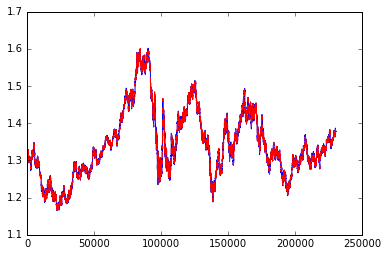

In [75]:
b = np.array(y[0:n_prev])[...,newaxis]
c = np.concatenate((b, compute_train, predicted))
plt.plot(y, 'b-', c, 'r--')